## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import pingouin as pg
import scipy.stats as sp
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.use('Agg')
sns.set_theme(style="ticks")
%matplotlib inline
from adjustText import adjust_text
print('ready')

ready


## Importing data 

In [6]:
df=pd.read_csv('C:/Users/amade/Documents/UofSC/Bioinformatics/Github/q_PCR_RNA_seq_validation.csv')
df.head(5)

,genes,log_fc_rna_seq,q_PCR
0,gene 1,2.195254,0.619916
1,gene 2,2.860757,1.799718
2,gene 3,2.411054,1.396448
3,gene 4,2.179533,0.459906
4,gene 5,1.694619,1.457493


## Converting qPCR values to Log2FC 

In [8]:
# Transforming qPCR values to Log2FC
df["PCR_log_2"]=np.log2(df['q_PCR'])
print(df)

       genes  log_fc_rna_seq     q_PCR  PCR_log_2
0     gene 1        2.195254  0.619916  -0.689856
1     gene 2        2.860757  1.799718   0.847771
2     gene 3        2.411054  1.396448   0.481762
3     gene 4        2.179533  0.459906  -1.120588
4     gene 5        1.694619  1.457493   0.543489
..       ...             ...       ...        ...
95   gene 96        0.732765  0.645836  -0.630759
96   gene 97        2.346052  0.843628  -0.245321
97   gene 98        0.080430  0.987527  -0.018109
98   gene 99        3.315760  1.471112   0.556907
99  gene 100        0.018782  0.016557  -5.916379

[100 rows x 4 columns]


## Pearson correlation 

In [9]:
pg.corr(x=df['log_fc_rna_seq'], y=df['PCR_log_2'])

,n,r,CI95%,p-val,BF10,power
pearson,100,0.672542,"[0.55, 0.77]",1.821828e-14,4.531e+11,1.0


## Plotting

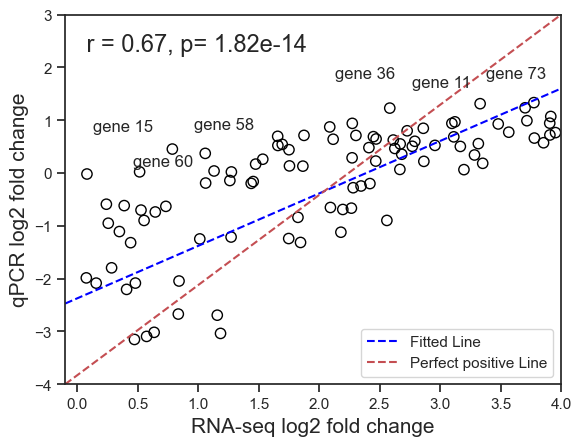

In [10]:
#List of genes to annotate
genes = ["gene 11","gene 15","gene 36","gene 58","gene 60",
        "gene 73"]

# Filter the DataFrame to include only the specified genes
df_filtered = df[df['genes'].isin(genes)]

#Plotting
plt.scatter(x=df['log_fc_rna_seq'], y=df['PCR_log_2'], s=55, facecolors='none', edgecolors='black')
plt.xlabel("RNA-seq log2 fold change", fontsize=15)
plt.ylabel("qPCR log2 fold change", fontsize=15)

#Calculate Pearson's correlation 
r, p = sp.pearsonr(df['log_fc_rna_seq'], df['PCR_log_2'])
ax = plt.gca()  # Get a matplotlib's axes 
plt.text(0.03, 0.9, f" r = {r:.2f}, p= {p:.2e}", transform=ax.transAxes, fontsize=17)

# Fit a line to the data
m, b = np.polyfit(df['log_fc_rna_seq'], df['PCR_log_2'], 1)
X_plot = np.linspace(-0.1, 4, 100)
plt.plot(X_plot, m * X_plot + b, '--', color='blue',label='Fitted Line')

# Create text annotations for the filtered genes
texts= [plt.text(df_filtered['log_fc_rna_seq'].iloc[i], df_filtered['q_PCR'].iloc[i], df_filtered['genes'].iloc[i], ha='center', va='bottom') for i in range(len(df_filtered))]
adjust_text(texts)

ax.set_xlim([-0.1, 4])
ax.set_ylim([-4, 3])
plt.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [ax.get_ylim()[0], ax.get_ylim()[1]], 'r--',label='Perfect positive Line') 

plt.legend(loc='lower right')
plt.show()